# PCA processing

Sources

https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Steps of calculating PCA: 

1. Subtract the mean of each value;
2. Calculate the Covariance Matrix: The covariance matrix is a square matrix donoting the covariance of elements with each other. The covariance of an element with itself is nothing but just its variance;
3. Compute the eigenvalues and eigenvectors:

    3.1 The eigenvectors of the covariance matrix we get are orthononal to each other and each vector represents a principle axis;    
    3.2 A higher eigenvalue corresponds to a higher variability. Hence the principal axis with the higher eigenvalue will be an axis captuting higher variability in the data;    
    3.3 Orthogonal means the vectors are mutually perpendicular to each other; 
    
4. Sort eigenvalues in descending order:

    4.1 Sort the eigenvalues in the descending order along with their corrsponding eigenvectors;    
    4.2 Each column in the eigen vector-matrix corresponds to a principal compoment, so arranging them in desciending order of their eigenvalue will automatically arrange the principal component in desciending order of their variability;    
    4.3 So the first column in the rearranged eigen vector-matrix will be a principle compionent that captures the highest variability.
    
5. Select a subset from the rearraged eigenvalue matrix

6. Transform the data. Transform the data by having a dot product between the transpose of the eigenvector subset and the transpose of the mean-centered data. 


PC actually is the direction with variance scaled. Direction can be decided by the eigenvectors of covariance. Eigenvalue means 

In [1]:
# import numpy as np
from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.io as sio
import pickle as pickle
import numpy.matlib
import numpy.ma as ma
import numpy as np
import glob
import copy
import matplotlib.gridspec as gridspec
import matplotlib.mlab as mlab
from fractions import Fraction
from matplotlib.pyplot import cm
import math
import datetime
import scipy.interpolate
import os
import shutil
from mpl_toolkits.basemap import Basemap
from numpy.linalg import inv
from numpy import matmul
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline
gs3b3 = gridspec.GridSpec(3,3)
gs1b3 = gridspec.GridSpec(1,3)
gs2b2 = gridspec.GridSpec(2,2)
gs1b1 = gridspec.GridSpec(1,1)
gs1b2 = gridspec.GridSpec(1,2)
gs2b1 = gridspec.GridSpec(2,1)
gs3b1 = gridspec.GridSpec(3,1)
cmap = matplotlib.cm.jet
%matplotlib nbagg
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
basedir='/Volumes/GoogleDrive/My Drive/Projects/EllipseAnalysis'
datafolder='/Data/'
savefigurefolder=basedir+'/savefigure/pca/'
data=loadmat(basedir+datafolder+'CleanTuv/STRAITOFGEORGIAARRAY_20201201T000000.000Z_20201207T230000.000Z-Totals_Clean.mat')
#data=data[0][0]

In [7]:
u=[]
v=[]
date=[]

num_files=168
for i in range(num_files):
    
    datai=data['Totals'][i][0]
    ui=datai['U']
    vi=datai['V']
    lonlat=datai['LonLat']
    
    timestamp=datai['TimeStamp'][0][0]
    datei=str(mdates.num2date(timestamp-1))[0:16]  
    
    u=np.append(u,ui)
    v=np.append(v,vi)
    date=np.append(date,datei)

lon=lonlat[:,0]
lat=lonlat[:,1]

In [8]:
u_df=pd.DataFrame(u.reshape(num_files,len(u)//num_files).T,index=[lon,lat],columns=date)
v_df=pd.DataFrame(v.reshape(num_files,len(u)//num_files).T,index=[lon,lat],columns=date)

In [9]:
max_index=373;
u_select=u_df.iloc[max_index]
v_select=v_df.iloc[max_index]

X=pd.DataFrame({'u':u_select,'v':v_select}).values
X_meaned=X-np.mean(X,axis=0)

# Step1: Subtract the mean of each value

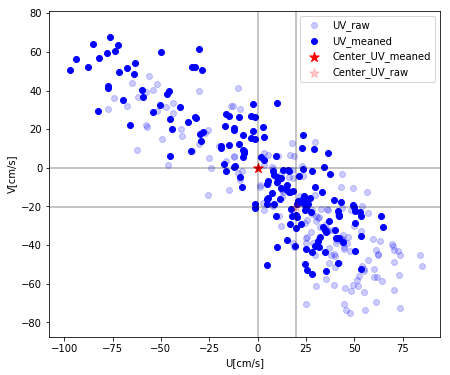

In [142]:
fig,axs=plt.subplots(1,1,sharex=True,sharey=True,figsize=(7,6))
ax=[]
plt.scatter(X[:,0],X[:,1],alpha=0.2,c='blue',label='UV_raw')

plt.scatter(X_meaned[:,0],X_meaned[:,1],c='blue',label='UV_meaned')

u_mean=np.mean(X,axis=0)[0]
v_mean=np.mean(X,axis=0)[1]


plt.scatter(0,0,c='red',marker='*',label='Center_UV_meaned',s=100)
plt.scatter(u_mean,v_mean,c='red',marker='*',alpha=0.2,label='Center_UV_raw',s=100)



plt.axvline(x = 0,color='black',alpha=0.3)
plt.axhline(y = 0,color='black',alpha=0.3)

plt.axvline(x = u_mean,color='black',alpha=0.3)
plt.axhline(y = v_mean,color='black',alpha=0.3)


plt.xlabel('U[cm/s]')
plt.ylabel('V[cm/s]')

plt.legend()
plt.axis('equal');


if not os.path.exists(savefigurefolder):
        os.makedirs(savefigurefolder)
plt.savefig(os.path.join(savefigurefolder,'Scatter'),format='png',dpi=300)#




# Step2: Calculate the covariance matrix

In [50]:
#calculate the covariance matrix
cov_mat=np.cov(X_meaned,rowvar=False)
cov_mat

array([[ 1421.66807372,  -979.16426684],
       [ -979.16426684,   923.47098422]])

# Step3: Compute the eigenvalues and eigenvectors: 
Eigenvalues represent variance

eigenvectors are normablized direction

In [51]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [54]:
eigen_values 

array([  162.2167458 ,  2182.92231214])

In [57]:
eigen_vectors

array([[-0.61378086, -0.78947644],
       [-0.78947644,  0.61378086]])

# Step4: Sort the eigenvalues and eigenvectors in descending order

In [64]:

sorted_index=np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [123]:
sorted_eigenvalue

array([ 2182.92231214,   162.2167458 ])

In [65]:
sorted_eigenvectors

array([[-0.78947644, -0.61378086],
       [ 0.61378086, -0.78947644]])

In [130]:
np.arctan(pca.components_[0,1]/pca.components_[0,0])*180/np.pi

-37.863388883617453

In [169]:
#angle can have a difference of 180 because PC1 PC2... does not have a direction.
angle=np.arctan(0.61378086/(-0.78947644))*180/np.pi+180
angle

142.1366111300494

In [77]:
vector_pc1=sorted_eigenvectors[:,0]
vector_pc2=sorted_eigenvectors[:,1]

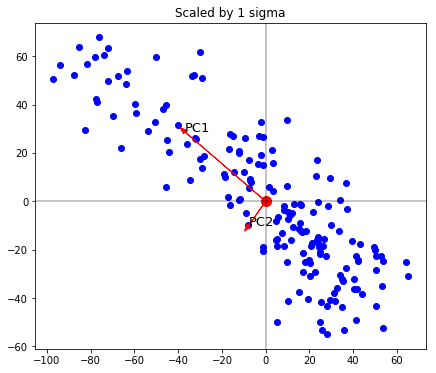

In [147]:
n_std=1
fig,axs=plt.subplots(1,1,sharex=True,sharey=True,figsize=(7,6))
ax=[]

plt.scatter(X_meaned[:,0],X_meaned[:,1],c='blue',label='UV_meaned')
plt.axvline(x = 0,color='black',alpha=0.3)
plt.axhline(y = 0,color='black',alpha=0.3)
plt.scatter(0,0,c='red',marker='o',label='Center_UV_meaned',s=100)

#arrow length are scaled by the eigenvalues which means variation

p.arrow(0,0,vector_pc1[0]*np.sqrt(sorted_eigenvalue[0])*n_std,vector_pc1[1]*np.sqrt(sorted_eigenvalue[0])*n_std,color='red',head_width=2, head_length=3)
p.arrow(0,0,vector_pc2[0]*np.sqrt(sorted_eigenvalue[1])*n_std,vector_pc2[1]*np.sqrt(sorted_eigenvalue[1])*n_std,color='red',head_width=2, head_length=3)

plt.text(vector_pc1[0]*np.sqrt(sorted_eigenvalue[0])*n_std,vector_pc1[1]*np.sqrt(sorted_eigenvalue[0])*n_std,'PC1',fontsize=13)
plt.text(vector_pc2[0]*np.sqrt(sorted_eigenvalue[1])*n_std,vector_pc2[1]*np.sqrt(sorted_eigenvalue[1])*n_std,'PC2',fontsize=13)
plt.title('Scaled by '+str(n_std)+' sigma')

if not os.path.exists(savefigurefolder):
        os.makedirs(savefigurefolder)
#plt.savefig(os.path.join(savefigurefolder,'PC_'+str(n_std)+'sigma'),format='png',dpi=300)#




# Add ellipse

Calculate ellipse major and minor axis, which are scaled by standard deviation (sqrt of eigenvalues)

In [159]:

n_std=2
ell_radius_x=np.sqrt((vector_pc1[0]*np.sqrt(sorted_eigenvalue[0])*n_std)**2+(vector_pc1[1]*np.sqrt(sorted_eigenvalue[0])*n_std)**2)
ell_radius_y=np.sqrt((vector_pc2[0]*np.sqrt(sorted_eigenvalue[1])*n_std)**2+(vector_pc2[1]*np.sqrt(sorted_eigenvalue[1])*n_std)**2)

In [160]:
xcenter=0
ycenter=0

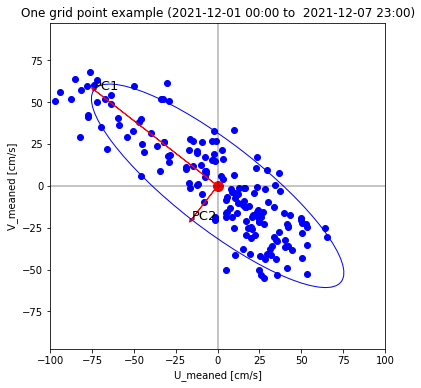

In [168]:

fig,axs=plt.subplots(1,1,sharex=True,sharey=True,figsize=(6,6))
ax=axs
plt.scatter(X_meaned[:,0],X_meaned[:,1],c='blue',label='UV_meaned')
plt.axvline(x = 0,color='black',alpha=0.3)
plt.axhline(y = 0,color='black',alpha=0.3)
plt.scatter(0,0,c='red',marker='o',label='Center_UV_meaned',s=100)

p.arrow(0,0,vector_pc1[0]*np.sqrt(sorted_eigenvalue[0])*n_std,vector_pc1[1]*np.sqrt(sorted_eigenvalue[0])*n_std,color='red',head_width=2, head_length=2)
p.arrow(0,0,vector_pc2[0]*np.sqrt(sorted_eigenvalue[1])*n_std,vector_pc2[1]*np.sqrt(sorted_eigenvalue[1])*n_std,color='red',head_width=2, head_length=2)

plt.text(vector_pc1[0]*np.sqrt(sorted_eigenvalue[0])*n_std,vector_pc1[1]*np.sqrt(sorted_eigenvalue[0])*n_std,'PC1',fontsize=13)
plt.text(vector_pc2[0]*np.sqrt(sorted_eigenvalue[1])*n_std,vector_pc2[1]*np.sqrt(sorted_eigenvalue[1])*n_std,'PC2',fontsize=13)

e = Ellipse(xy = (xcenter,ycenter), width = ell_radius_x * 2, height =ell_radius_y * 2, angle=angle,
           edgecolor='blue',facecolor='none',joinstyle='bevel',
                     linewidth=1)

ax.add_artist(e)


ax.set_xlabel('U_meaned [cm/s]')
ax.set_ylabel('V_meaned [cm/s]')

ax.set_title('One grid point example ('+date[0]+' to  '+date[-1]+')');

plt.axis('equal');

ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
if not os.path.exists(savefigurefolder):
        os.makedirs(savefigurefolder)
    #savefilename='Example_Ellipse'+'.png'
plt.savefig(os.path.join(savefigurefolder,'Example_Ellipse'),format='png',dpi=300)#


